# Topics to cover



## [0. Install](#0)


## [1. Image features](#1)
        1. What constitutes a feature
        2. Edges, contours, corners, colors, and blobs as features
        2. The use of features
        3. Invariance in features
            1. scale
            2. rotation
            3. translation
            4. perspective
            5. affine
            6. color


## [2. Corners as features](#2)
        - 1. What are corners
        - 2. What is their importance
        - 3. Need and applications
        - 4. Harris corner
        - 5. Shi-tomasi corner detection
        - 6. Fast Corner detection OpenCV
        
    
## [3. Feature extraction and visualization using OpenCV and PIL](#3)
        - 1. Level A features
            - Hog features
            - Daisy features
            - GLCM features
            - Haar features
            - LBP features
            - Orientations of corners
            - Blob features
        - 2. Level B Features
            - SIFT features
            - CENSURE features
            - SURF features
            - BRIEF features
            - BRISK features
            - KAZE features
            - AKAZE features
            - ORB features
        
## [4. Feature matching](#4)
        - 1. What is feature Matching
        - 2. Applications of feature matching
        - 3. Feature Matching using OpenCV
        - 4. What are the elements of feature matcher object in OpenCV
        - 5. What is RANSAC
        - 6. Flann based matcher
        - 7. Homography
            - What is homography?
            - Using homography for feature matching
    
    
    
## [5. Image stitching](#5)
        - What is image stitching
        - Applications of image stitching
        - Panaroma creations and image stitching
        - Image Stitching using OpenCV



<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# Select the requirements file as per OS and CUDA version or CPU version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

In [1]:
# Imports
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
%matplotlib inline

<a id='1'></a>
# Image Features

In [3]:
print("Use slider to change slides")
# Slide section 1
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=1, min=1, max=7);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=1, description='slide_num', max=7, min=1), Output()), _dom_classes=('wid…

<a id='2'></a>
# Corners as features

In [4]:
print("Use slider to change slides")
# Slide section 2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=8, min=8, max=12);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);
 

Use slider to change slides


interactive(children=(IntSlider(value=8, description='slide_num', max=12, min=8), Output()), _dom_classes=('wi…

## Harris Corner detection using OpenCV

In [5]:
print("Use slider to change slides")
# Slide section 3
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=13, min=13, max=13);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=13, description='slide_num', max=13, min=13), Output()), _dom_classes=('…

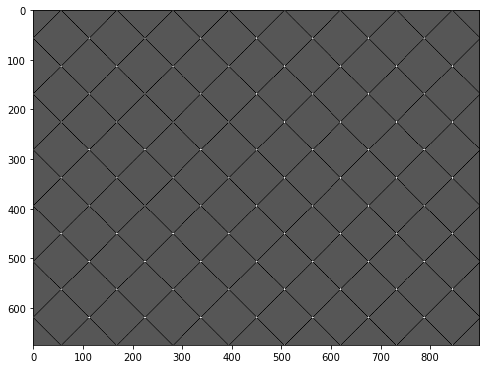

In [6]:
##Harris Corners using OpenCV
    
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/chess_slant.jpg", 1);
#img = cv2.resize(img, (96, 96));

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)


################################FOCUS#######################################
dst = cv2.cornerHarris(gray,2,3,0.04)
############################################################################
# Self-study: Parameters


plt.figure(figsize=(8, 8))
plt.imshow(dst, cmap="gray");
plt.show()


In [7]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

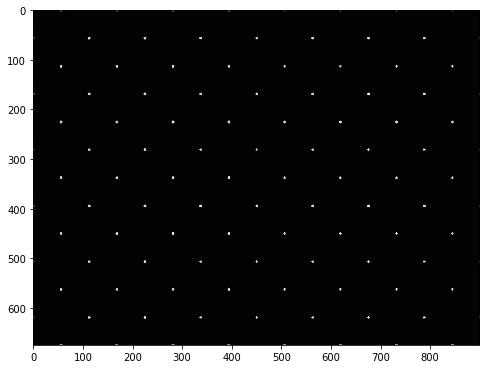

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(dst, cmap="gray");
plt.show()

In [9]:
# Threshold for an optimal value, it may vary depending on the image.

# We first calculate what is the maximum and minimum value of pixel in this image
max_val = np.uint8(dst).max();
min_val = np.uint8(dst).min();

print("max_val = {}".format(max_val));
print("min_val = {}".format(min_val));

max_val = 255
min_val = 0


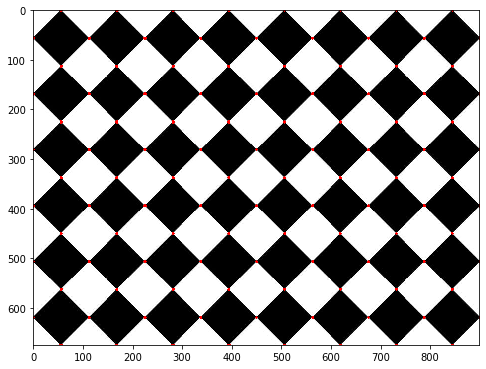

In [11]:
img = cv2.imread("imgs/chapter9/chess_slant.jpg", 1);
img[dst>0.1*dst.max()]=[0,0,255]

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

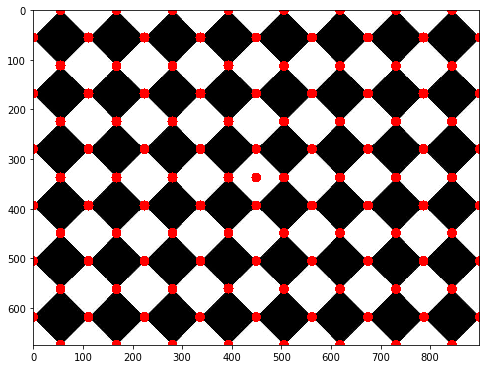

In [12]:
# Finding the coordinates of corners using opencv harris corner

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/chess_slant.jpg", 1);
#img = cv2.resize(img, (96, 96));
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
# Explain Criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)

for x1, y1, x2, y2 in res:
    #cv2.circle(img,(x1, y1), 5, (0,255,0), -1) # Point Centroids
    cv2.circle(img,(x2, y2), 10, (0,0,255), -1) # Point corners

#img[res[:,1],res[:,0]]=[0,0,255]
#img[res[:,3],res[:,2]] = [0,255,0]

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

In [3]:
# Interactive demo - 1
# Understanding the effect of thresholding in harris corner detection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np
from matplotlib import pyplot as plt

lst = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000005]
sl1 = widgets.SelectionSlider(value=0.01, options=lst);

def f(threshold):
    img = cv2.imread("imgs/chapter9/tessellate.png", 1);
    #img = cv2.resize(img, (96, 96));
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # find Harris corners
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    ret, dst = cv2.threshold(dst,threshold*dst.max(),255,0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

    # Now draw them
    res = np.hstack((centroids,corners))
    res = np.int0(res)

    for x1, y1, x2, y2 in res:
        #cv2.circle(img,(x1, y1), 5, (0,255,0), -1) # Point Centroids
        cv2.circle(img,(x2, y2), 8, (0,0,255), -1) # Point corners

    plt.figure(figsize=(10, 10))
    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, threshold=sl1);

interactive(children=(SelectionSlider(description='threshold', index=1, options=(0.1, 0.01, 0.001, 0.0001, 1e-…

## Shi Tomasi Corner detection using OpenCV

In [14]:
print("Use slider to change slides")
# Slide section 4
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=14, min=14, max=14);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=14, description='slide_num', max=14, min=14), Output()), _dom_classes=('…

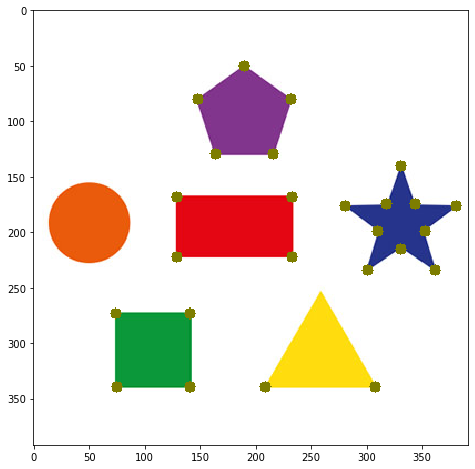

In [15]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/shape.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

################################FOCUS################################
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
# Self-study: Parameters
corners = np.int0(corners)
#####################################################################

################################FOCUS################################
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)
#####################################################################    
    

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

## Shi-Tomasi Corners

In [6]:
# Interactive demo - 2
# Understanding the effect of best-n corners and min_distance in shi-tomasi corners

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np

sl1 = widgets.IntSlider(value=30, min=10, max=200, step=10);
sl2 = widgets.IntSlider(value=10, min=0, max=100, step=5);

def f(best, min_distance):
    img = cv2.imread("imgs/chapter9/indoor.jpg", 1);
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(gray, best, 0.01, min_distance)
    corners = np.int0(corners)

    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y), 5,(0, 0, 255),-1)

    plt.figure(figsize=(10, 10))
    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, best=sl1, min_distance = sl2);

interactive(children=(IntSlider(value=30, description='best', max=200, min=10, step=10), IntSlider(value=10, d…

## OpenCV Fast Corners

In [17]:
print("Use slider to change slides")
# Slide section 5
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=15, min=15, max=15);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=15, description='slide_num', max=15, min=15), Output()), _dom_classes=('…

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  225
Total Keypoints without nonmaxSuppression:  1633


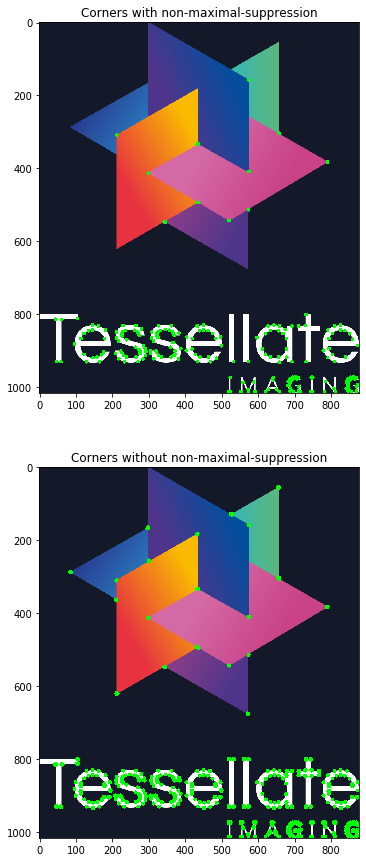

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('imgs/chapter9/tessellate.png',1)
img2 = img.copy();
img3 = img.copy();






###############################FOCUS####################################
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
########################################################################














for i in kp:
    x,y = int(i.pt[0]), int(i.pt[1]);
    cv2.circle(img2,(x,y), 5,(0, 255, 0),-1)

# Print all default params
print ("Threshold: ", fast.getThreshold())
print ("nonmaxSuppression: ", fast.getNonmaxSuppression())
print ("neighborhood: ", fast.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(kp))


# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)

print ("Total Keypoints without nonmaxSuppression: ", len(kp))

for i in kp:
    x,y = int(i.pt[0]), int(i.pt[1]);
    cv2.circle(img3,(x,y), 5,(0, 255, 0),-1)


f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Corners with non-maximal-suppression');
plt.imshow(img2[:, :,::-1])
f.add_subplot(2, 1, 2).set_title('Corners without non-maximal-suppression');
plt.imshow(img3[:, :,::-1]);
plt.show()

In [22]:
# Timing harris corners, shi-tomasi corners, and fast corners in opencv
import numpy as np
import cv2
from matplotlib import pyplot as plt

def harris_corner(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # find Harris corners
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    ret, dst = cv2.threshold(dst,0.0001*dst.max(),255,0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    
def shi_tomasi_corner(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
    corners = np.int0(corners)
    
def fast_corner(img):
    fast = cv2.FastFeatureDetector_create()
    kp = fast.detect(img,None)


In [23]:
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

In [24]:
%timeit harris_corner(img);

9.13 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit shi_tomasi_corner(img);

4.57 ms ± 82.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit fast_corner(img);

1.04 ms ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<a id='3'></a>
# Different features in Image Processing

### Hog Features

In [27]:
print("Use slider to change slides")
# Slide section 6
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=16, min=16, max=16);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=16, description='slide_num', max=16, min=16), Output()), _dom_classes=('…

### Implementing Hog features using Skimage

(322218,)


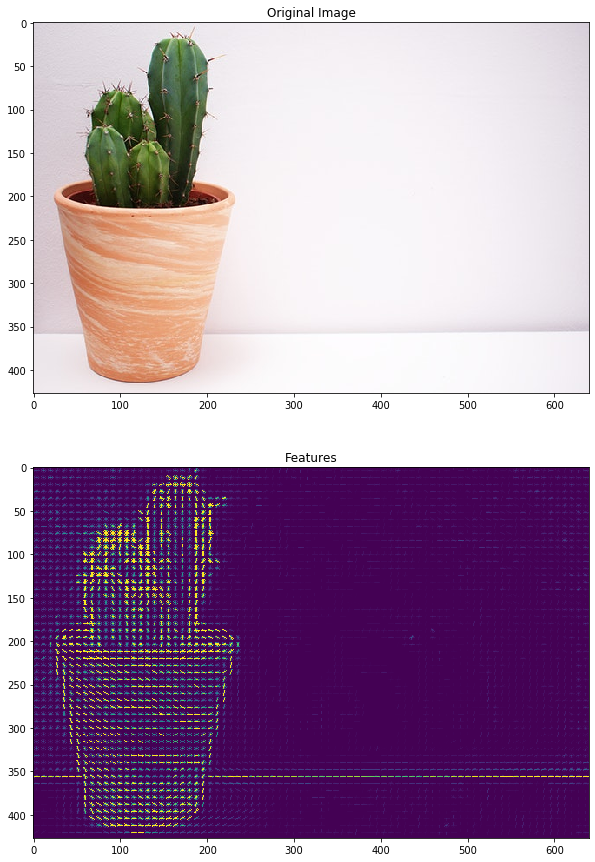

In [28]:
%matplotlib inline
import numpy as np
import skimage
import skimage.feature
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/plant.jpg", 1);

features, output = skimage.feature.hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(3, 3), block_norm='L2-Hys', 
                    visualize=True, transform_sqrt=False, feature_vector=True, multichannel=None)

print(features.shape);

# Rescale histogram for better display
output = skimage.exposure.rescale_intensity(output, in_range=(0, 10))


f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Original Image');
plt.imshow(img[:, :,::-1])
f.add_subplot(2, 1, 2).set_title('Features');
plt.imshow(output);
plt.show()

### Daisy Features

In [29]:
print("Use slider to change slides")
# Slide section 7
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=17, min=17, max=17);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=17, description='slide_num', max=17, min=17), Output()), _dom_classes=('…

#### 3.1.2.2. Implementing Daisy features using Skimage

(2, 3, 153)


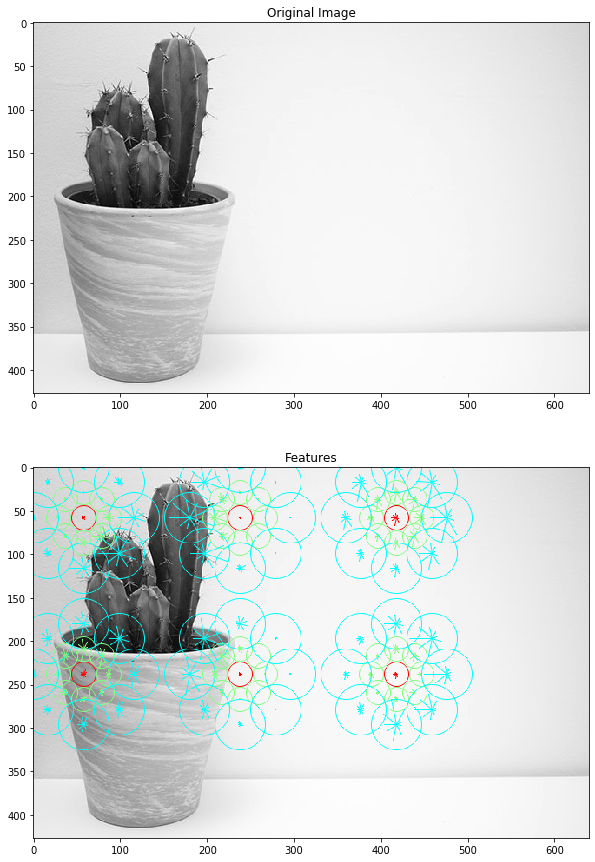

In [30]:
%matplotlib inline
import numpy as np
import skimage
import skimage.feature
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/plant.jpg", 0);
#img = cv2.resize(img, (img.shape[0]//4,img.shape[1]//4));

features, output = skimage.feature.daisy(img, step=180, radius=58, rings=2, histograms=8, 
                                         orientations=9, visualize=True)
print(features.shape);

# Rescale histogram for better display
#output = skimage.exposure.rescale_intensity(output, in_range=(0, 10))


f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Original Image');
plt.imshow(img, cmap="gray")
f.add_subplot(2, 1, 2).set_title('Features');
plt.imshow(output);
plt.show()

### GLCM Features

In [31]:
print("Use slider to change slides")
# Slide section 8
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=18, min=18, max=18);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=18, description='slide_num', max=18, min=18), Output()), _dom_classes=('…

In [ ]:
### 3.1.3.2. Implementing GLCM features using Skimage

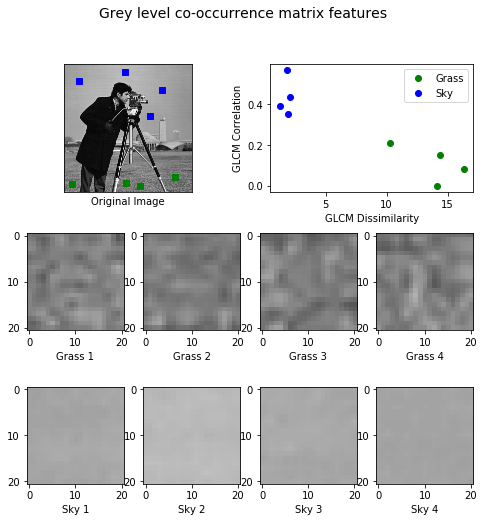

In [32]:
# Source: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data


PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(474, 291), (440, 433), (466, 18), (462, 236)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(54, 48), (21, 233), (90, 380), (195, 330)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
plt.show()


### Haar Features

In [33]:
print("Use slider to change slides")
# Slide section 9
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=19, min=19, max=19);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=19, description='slide_num', max=19, min=19), Output()), _dom_classes=('…

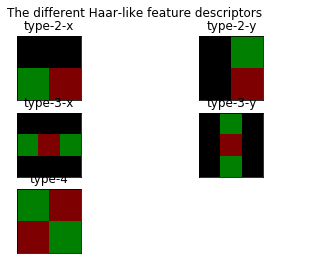

In [34]:
# Source: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_haar.html

# Haar like feature Descriptors
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from skimage.feature import haar_like_feature_coord, draw_haar_like_feature

images = [np.zeros((2, 2)), np.zeros((2, 2)),
          np.zeros((3, 3)), np.zeros((3, 3)),
          np.zeros((2, 2))]

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

fig, axs = plt.subplots(3, 2)
for ax, img, feat_t in zip(np.ravel(axs), images, feature_types):
    coord, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0,
                                          img.shape[0],
                                          img.shape[1],
                                          coord,
                                          max_n_features=1,
                                          random_state=0)
    ax.imshow(haar_feature)
    ax.set_title(feat_t)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The different Haar-like feature descriptors')
plt.axis('off')
plt.show()

### LBP Features

In [35]:
print("Use slider to change slides")
# Slide section 10
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=20, min=20, max=20);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=20, description='slide_num', max=20, min=20), Output()), _dom_classes=('…

(2, 3, 153)


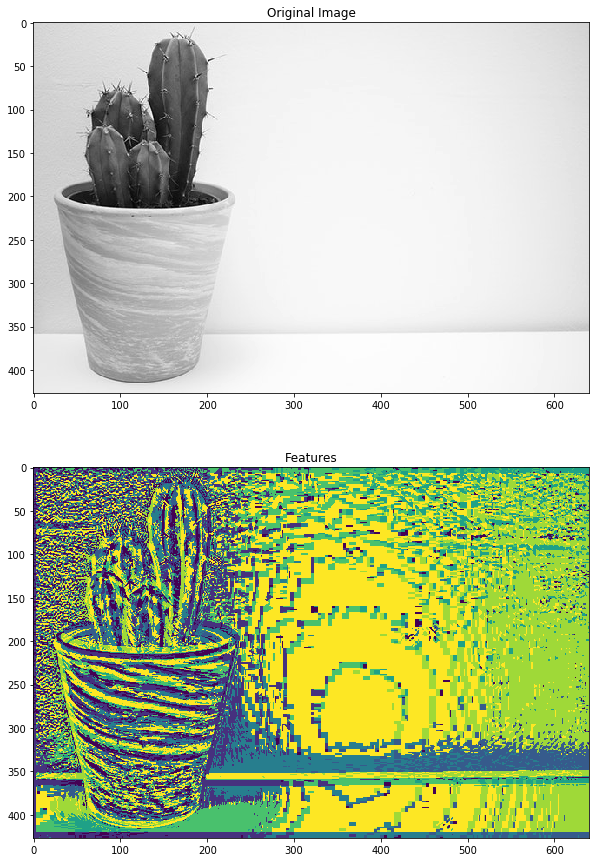

In [36]:
%matplotlib inline
import numpy as np
import skimage
import skimage.feature
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/plant.jpg", 0);
#img = cv2.resize(img, (img.shape[0]//4,img.shape[1]//4));

output = skimage.feature.local_binary_pattern(img, 3, 8, method='default')
print(features.shape);

# Rescale histogram for better display
#output = skimage.exposure.rescale_intensity(output, in_range=(0, 10))


f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Original Image');
plt.imshow(img, cmap="gray")
f.add_subplot(2, 1, 2).set_title('Features');
plt.imshow(output);
plt.show()

### Orientation of corners as Features

### Visualizing Orientation of corners

In [37]:
%matplotlib inline
from skimage.morphology import octagon
import numpy as np
import skimage
import skimage.feature
import cv2
from matplotlib import pyplot as plt

from skimage.feature import (corner_fast, corner_peaks,corner_orientations)
square = np.zeros((12, 12))
square[3:9, 3:9] = 1
print("Input:");
print(square.astype(int))

corners = corner_peaks(corner_fast(square, 9), min_distance=1)
print("Corners:");
print(corners);

orientations = corner_orientations(square, corners, octagon(3, 2))
print("Output:")
print(np.rad2deg(orientations))

Input:
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Corners:
[[3 3]
 [3 8]
 [8 3]
 [8 8]]
Output:
[  45.  135.  -45. -135.]


### Blob Features

In [38]:
# Slide section 11
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=21, min=21, max=21);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=21, description='slide_num', max=21, min=21), Output()), _dom_classes=('…

In [ ]:
### 3.1.7.2 Blobs using Skimage

(91, 3)


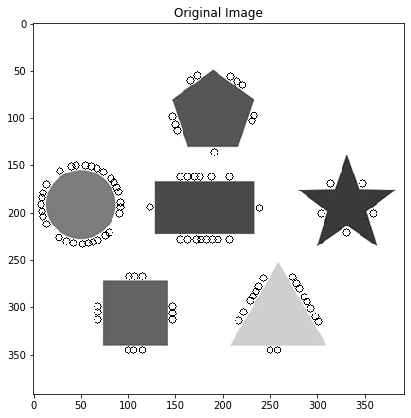

In [39]:

%matplotlib inline
import numpy as np
import skimage
import skimage.feature
import cv2
import math
from matplotlib import pyplot as plt

img = cv2.imread("imgs/chapter9/shape.jpg", 0)
#img = skimage.data.hubble_deep_field()[0:500, 0:500]
#image_gray = skimage.color.rgb2gray(image)

blobs = skimage.feature.blob_dog(img, max_sigma=5, threshold=0.05)

blobs[:, 2] = blobs[:, 2]
print(blobs.shape)

for y , x, r in blobs:
    cv2.circle(img,(int(x), int(y)), int(r), (0,255,0), 1)


f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Original Image');
plt.imshow(img, cmap="gray")
plt.show()

## Using blobs to detect deep-space galaxies

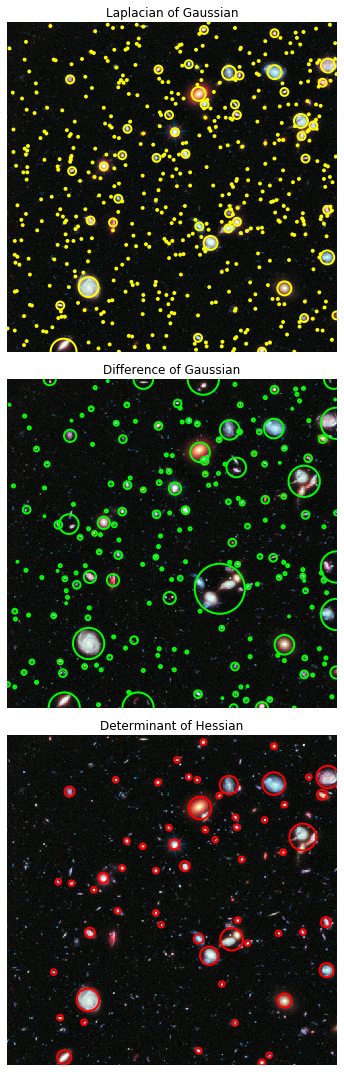

In [7]:
# Source: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

## SIFT Features

In [41]:
# Slide section 12
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=22, min=22, max=23);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=22, description='slide_num', max=23, min=22), Output()), _dom_classes=('…

### Implementing SIFT features using OpenCV

In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

In [ ]:
# NOTE: Patented work. Cannot be used for commercial purposes
# pip install opencv-contrib-python==3.4.2.16
# pip install opencv-python==3.4.2.16
%matplotlib inline
import numpy as np
import cv2
print(cv2.__version__)
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)


for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

### CENSURE Features

In [42]:
# Slide section 13
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=24, min=24, max=24);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=24, description='slide_num', max=24, min=24), Output()), _dom_classes=('…

### 3.2.2.2 Implementing CENSURE features using Skimage

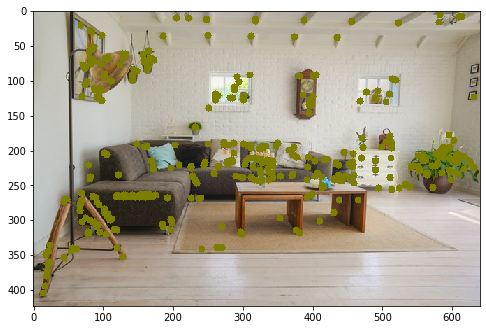

In [43]:
%matplotlib inline
import numpy as np
import cv2
import skimage.feature
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

detector = skimage.feature.CENSURE(min_scale=1, max_scale=7, mode='Star', 
                                          non_max_threshold=0.05, line_threshold=10)

detector.detect(gray)

for i in detector.keypoints:
    x,y = int(i[1]), int(i[0])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()




### SURF Features

In [44]:
# Slide section 14
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=25, min=25, max=25);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=25, description='slide_num', max=25, min=25), Output()), _dom_classes=('…

### 3.2.3.2 Implementing SURF features using OpenCV

In [ ]:
# NOTE: Patented work. Cannot be used for commercial purposes
# pip install opencv-contrib-python==3.4.2.16
# pip install opencv-python==3.4.2.16
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(1000)
keypoints, descriptors = surf.detectAndCompute(gray, None)


for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

### BRIEF Features

In [45]:
# Slide section 15
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=26, min=26, max=26);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=26, description='slide_num', max=26, min=26), Output()), _dom_classes=('…

### 3.2.4.2 Implementing BRIEF features using OpenCV


In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
kp = star.detect(gray,None)

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
keypoints, descriptors = brief.compute(gray, kp)


for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

### BRISK Features

In [47]:
# Slide section 16
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=27, min=27, max=27);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=27, description='slide_num', max=27, min=27), Output()), _dom_classes=('…

### Implementing BRISK features using OpenCV

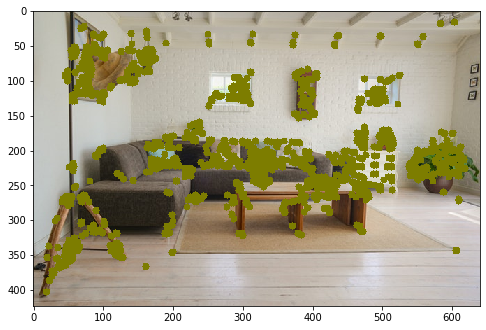

In [48]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

brisk = cv2.BRISK_create()
keypoints, descriptors = brisk.detectAndCompute(gray, None)

for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()



### KAZE and Accelerated-KAZE features
    - http://www.robesafe.com/personal/pablo.alcantarilla/kaze.html

### KAZE Features using OpenCV

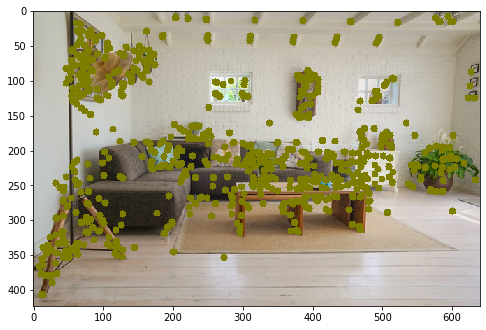

In [49]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kaze = cv2.KAZE_create()
keypoints, descriptors = kaze.detectAndCompute(gray, None)

for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

###  AKAZE Features using OpenCV

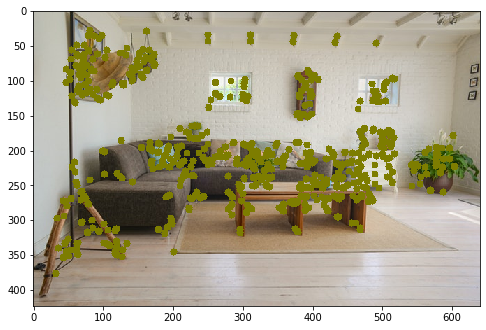

In [50]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

akaze = cv2.AKAZE_create()
keypoints, descriptors = akaze.detectAndCompute(gray, None)

for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

### ORB Features
    - Oriented Fast and Robust BRIEF Features

### Orb Features using OpenCV

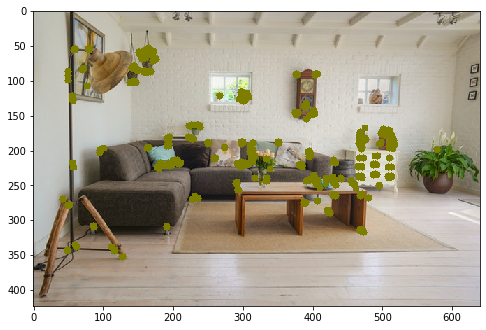

In [51]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(500)
keypoints, descriptors = orb.detectAndCompute(gray, None)

for i in keypoints:
    x,y = int(i.pt[0]), int(i.pt[1])
    cv2.circle(img,(x,y), 5,(0, 125, 125),-1)

plt.figure(figsize=(8, 8))
plt.imshow(img[:,:,::-1]);
plt.show()

<a id='4'></a>
# Feature Matching

In [52]:
# Slide section 17
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=28, min=28, max=28);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=28, description='slide_num', max=28, min=28), Output()), _dom_classes=('…

### Feature Matching using OpenCV

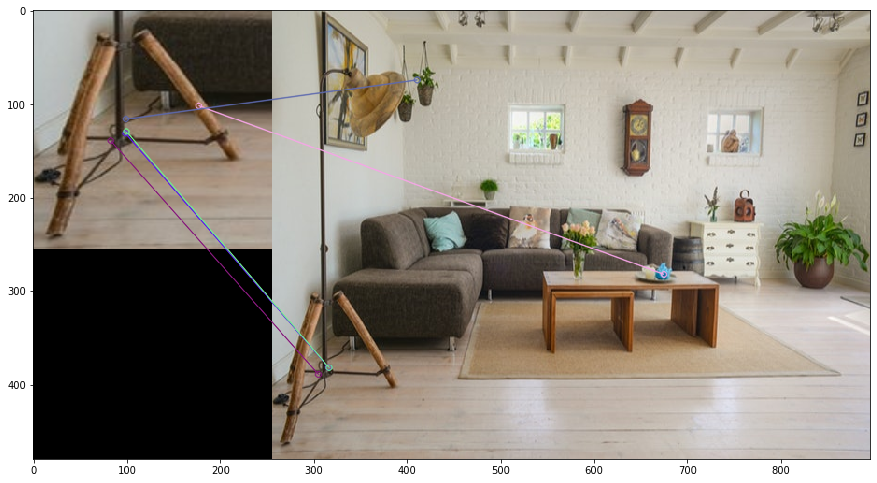

In [53]:
# Using Brute-Force matching

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

orb = cv2.ORB_create(500)

img1 = cv2.imread("imgs/chapter9/indoor_lamp.jpg", 1);
img1 = cv2.resize(img1, (256, 256));
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);

img2 = cv2.imread("imgs/chapter9/indoor.jpg", 1);
img2 = cv2.resize(img2, (640, 480));
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY);

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

        # cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 15))
plt.imshow(img3[:,:,::-1]);
plt.show();

In [ ]:
# Lets see how SIFT features turn out to be
# NOTE: Patented work. Cannot be used for commercial purposes
# pip install opencv-contrib-python==3.4.2.16
# pip install opencv-python==3.4.2.16
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

sift = cv2.xfeatures2d.SIFT_create();

img1 = cv2.imread("imgs/chapter9/indoor_lamp.jpg", 1);
img1 = cv2.resize(img1, (256, 256));
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);

img2 = cv2.imread("imgs/chapter9/indoor.jpg", 1);
img2 = cv2.resize(img2, (640, 480));
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY);

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.65*n.distance:
        good.append([m])

        # cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 15))
plt.imshow(img3[:,:,::-1]);
plt.show();

In [ ]:
# Lets see how SIFT features turn out to be
# NOTE: Patented work. Cannot be used for commercial purposes
# pip install opencv-contrib-python==3.4.2.16
# pip install opencv-python==3.4.2.16
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

sift = cv2.xfeatures2d.SIFT_create();

img1 = cv2.imread("imgs/chapter9/indoor_lamp.jpg", 1);
img1 = imutils.rotate_bound(img1, 30)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);


img2 = cv2.imread("imgs/chapter9/indoor.jpg", 1);
img2 = cv2.resize(img2, (640, 480));
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY);

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.65*n.distance:
        good.append([m])

        # cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 15))
plt.imshow(img3[:,:,::-1]);
plt.show();

### 4.5.2. FLann based matcher using OpenCV

In [ ]:
# Lets see how SIFT features turn out to be
# NOTE: Patented work. Cannot be used for commercial purposes
# pip install opencv-contrib-python==3.4.2.16
# pip install opencv-python==3.4.2.16
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

sift = cv2.xfeatures2d.SIFT_create();

img1 = cv2.imread("imgs/chapter9/indoor_lamp.jpg", 1);
img1 = imutils.rotate_bound(img1, 30)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);


img2 = cv2.imread("imgs/chapter9/indoor.jpg", 1);
img2 = cv2.resize(img2, (640, 480));
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY);

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize=(15, 15))
plt.imshow(img3[:,:,::-1]);
plt.show();

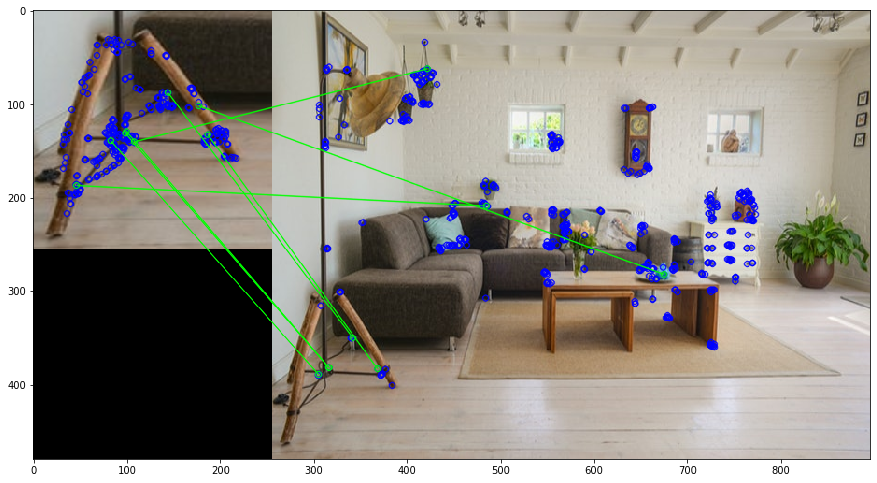

In [55]:
# Using Flann-based matching on ORB features

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

orb = cv2.ORB_create(500)

img1 = cv2.imread("imgs/chapter9/indoor_lamp.jpg", 1);
img1 = cv2.resize(img1, (256, 256));
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);

img2 = cv2.imread("imgs/chapter9/indoor.jpg", 1);
img2 = cv2.resize(img2, (640, 480));
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY);

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize=(15, 15))
plt.imshow(img3[:,:,::-1]);
plt.show();

### 4.6.2. Using homography for feature matching in OpenCV

In [ ]:
# Link: https://docs.opencv.org/3.4.1/d9/dab/tutorial_homography.html

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter9/indoor.jpg", 1);
import imutils
akaze = cv2.AKAZE_create()


img1 = cv2.imread("iimgs/chapter9/ndoor_lamp.jpg", 1);
img1 = cv2.resize(img1, (256, 256));
img1 = imutils.rotate_bound(img1, 30)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);

img2 = cv2.imread("imgs/chapter9/indoor.jpg", 1);
img2 = cv2.resize(img2, (640, 480));
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY);

# find the keypoints and descriptors with SIFT
kp1, des1 = akaze.detectAndCompute(img1,None)
kp2, des2 = akaze.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
        
MIN_MATCH_COUNT = 10;        
# HOMOGRAPHY
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure(figsize=(15, 15))
plt.imshow(img3[:,:,::-1]);
plt.show();

<a id='5'></a>
# Image stitching

In [56]:
# Slide section 18
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=29, min=29, max=30);

def f(slide_num):
    img_name = "imgs/chapter9/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=29, description='slide_num', max=30, min=29), Output()), _dom_classes=('…

## Image Stitching using OpenCV

In [ ]:
!pip install -U opencv-python
!pip install -U opencv-contrib-python

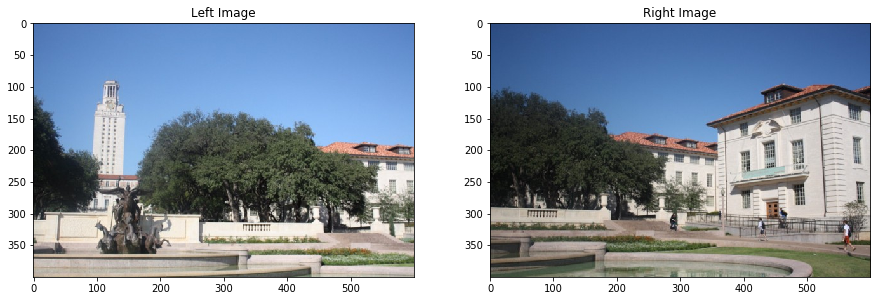

In [57]:
#Source: https://docs.opencv.org/4.0.0/d5/d48/samples_2python_2stitching_8py-example.html
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import argparse
import sys

modes = (cv2.Stitcher_PANORAMA, cv2.Stitcher_SCANS)

# read input images
imgs = [cv2.imread("imgs/chapter9/left.jpeg", 1), 
        cv2.imread("imgs/chapter9/right.jpeg", 1)]


stitcher = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
status, pano = stitcher.stitch(imgs)


f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Left Image');
plt.imshow(imgs[0][:,:,::-1])
f.add_subplot(1, 2, 2).set_title('Right Image');
plt.imshow(imgs[1][:,:,::-1]);
plt.show()

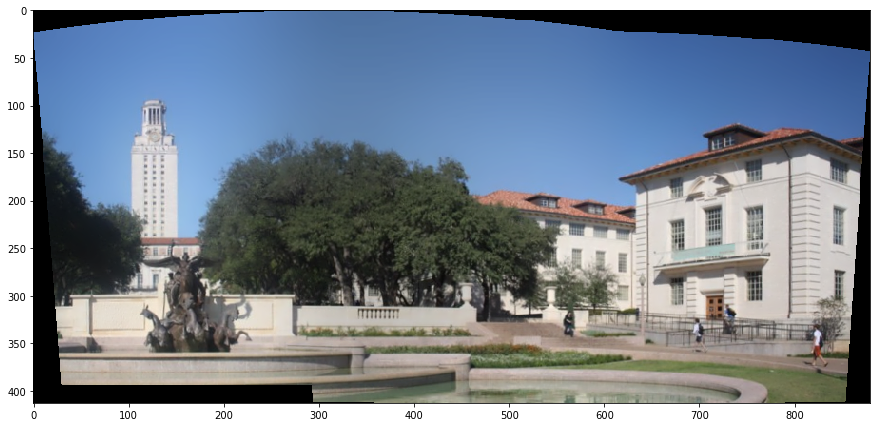

In [58]:
plt.figure(figsize=(15, 15))
plt.imshow(pano[:,:,::-1]);
plt.show()